# Notebook for analyzing the results obtained from larger networks

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from bnsl.scoring import compute_shd

In [11]:
root = Path.cwd().parents[1]    # two levels up
files = list((root / "data" / "results" / "medium").rglob("*.json"))

In [ ]:
records = []
for f in files:
    with open(f) as fp:
        r = json.load(fp)
        record = {
            "algorithm": r["algorithm"],
            "network": r["network"].split("/")[-1].split(".")[0],
            "num_samples": r["num_samples"],
            "score": r["score"],
            "theoretical_upper_bound": r["bounds"].get("theoretical_upper_bound"),
            "naive_upper_bound": r["bounds"].get("naive_upper_bound"),
            "runtime": r["seconds_elapsed"],
            "k": r["params"].get("k"),
            "l": r["params"].get("l"),
            "num_vars": r["num_variables"],
            "seed": r["seed"],
            "parent_map": r.get("parent_map"),
        }
        records.append(record)

df = pd.DataFrame(records)

hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello


In [13]:
df.head()

,algorithm,network,num_samples,score,theoretical_upper_bound,naive_upper_bound,runtime,k,l,num_vars,seed,parent_map
0,approximation_algorithm,child,10000,-124265.533,-32776.350,-99723.130,6.762,3,2,20,42,"{'Age': ['Disease', 'Sick'], 'BirthAsphyxia': ..."
1,approximation_algorithm,Water,10000,-129302.647,185453.352,-102378.985,69.693,2,1,32,42,"{'0': ['9'], '1': ['4'], '10': ['0', '13', '9'..."
2,approximation_algorithm,child,10000,-123373.220,-77405.551,-99723.130,78.699,5,4,20,43,"{'Age': [], 'BirthAsphyxia': [], 'CO2': ['CO2R..."
3,approximation_algorithm,child,100000,-1219641.243,-759115.275,-961059.798,135.073,5,4,20,44,"{'Age': [], 'BirthAsphyxia': ['Age'], 'CO2': [..."
4,approximation_algorithm,child,100000,-1220851.465,-607220.249,-961059.798,53.003,4,3,20,43,"{'Age': ['Disease', 'Sick'], 'BirthAsphyxia': ..."


In [14]:
df["theory_runtime"] = 2 ** ((df["l"] / df["k"]) * df["num_vars"])

In [15]:
df.head()

,algorithm,network,num_samples,score,theoretical_upper_bound,naive_upper_bound,runtime,k,l,num_vars,seed,parent_map,theory_runtime
0,approximation_algorithm,child,10000,-124265.533,-32776.350,-99723.130,6.762,3,2,20,42,"{'Age': ['Disease', 'Sick'], 'BirthAsphyxia': ...",10321.273241
1,approximation_algorithm,Water,10000,-129302.647,185453.352,-102378.985,69.693,2,1,32,42,"{'0': ['9'], '1': ['4'], '10': ['0', '13', '9'...",65536.000000
2,approximation_algorithm,child,10000,-123373.220,-77405.551,-99723.130,78.699,5,4,20,43,"{'Age': [], 'BirthAsphyxia': [], 'CO2': ['CO2R...",65536.000000
3,approximation_algorithm,child,100000,-1219641.243,-759115.275,-961059.798,135.073,5,4,20,44,"{'Age': [], 'BirthAsphyxia': ['Age'], 'CO2': [...",65536.000000
4,approximation_algorithm,child,100000,-1220851.465,-607220.249,-961059.798,53.003,4,3,20,43,"{'Age': ['Disease', 'Sick'], 'BirthAsphyxia': ...",32768.000000


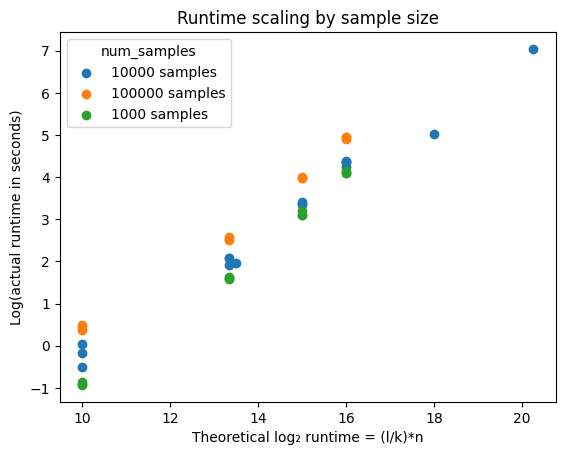

In [22]:
import matplotlib.pyplot as plt

df["theory_log"] = (df["l"] / df["k"]) * df["num_vars"]
df["actual_log"] = np.log(df["runtime"])

unique_samples = df["num_samples"].unique()

for s in unique_samples:
    subset = df[df["num_samples"] == s]
    plt.scatter(
        subset["theory_log"],
        subset["actual_log"],
        label=f"{s} samples"
    )

plt.xlabel("Theoretical log₂ runtime = (l/k)*n")
plt.ylabel("Log(actual runtime in seconds)")
plt.legend(title="num_samples")
plt.title("Runtime scaling by sample size")
plt.show()